# Importing Libraries


In [11]:
import numpy as np
import pandas as pd
import seaborn as sb

# Importing Dataset

In [12]:
dataset = pd.read_csv('spam.tsv', delimiter = '\t', quoting = 3)
x = dataset.iloc[:, 1]
y = dataset.iloc[:, 0]

# Data Visualisation

<Axes: xlabel='v1', ylabel='Count'>

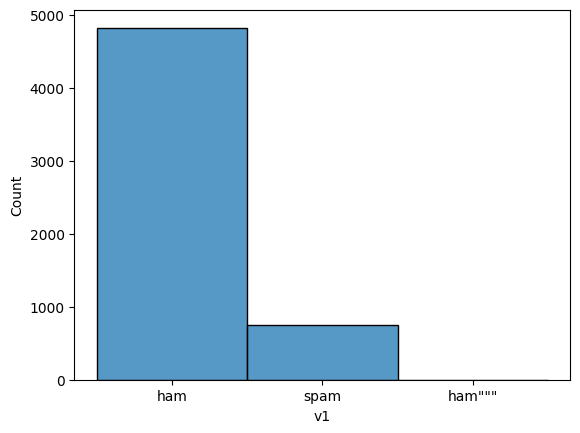

In [13]:
sb.histplot(y)

In [14]:
# Changing None with some stopword
x[99] = 'i'

# Encoding the Dependent Data

In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Cleaning the Messages

In [16]:
pip install nltk

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

all_stopwords = stopwords.words('english')
all_stopwords.remove('not')

ps = PorterStemmer()

def getStemmedMessage(msg):
    msg = re.sub('[^a-zA-Z]', ' ', msg)
    msg = msg.lower()
    msg = msg.split()
    msg = [ps.stem(word) for word in msg if not word in set(all_stopwords)]
    new_msg = ' '.join(msg)
    return new_msg

cleaned_x = []
for i in x:
    cleaned_x.append(getStemmedMessage(i))

cleaned_x

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jaipr\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother not like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank brea

# Method 1 of Prediction

## Feature Extraction

In [18]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
new_x = cv.fit_transform(cleaned_x).toarray()


## Train_Test Split

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(new_x, y, test_size = 0.20, random_state = 0)

## Model Training

In [20]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, Y_train)

GaussianNB()

In [21]:
Y_pred = classifier.predict(X_test)
print(np.concatenate((Y_pred.reshape(len(Y_pred),1), Y_test.reshape(len(Y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Data Evaluation

In [22]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(Y_test, Y_pred)
print(cm)
print("Accuracy : {: .2f} %".format(accuracy_score(Y_test, Y_pred)*100))

[[834   4 112]
 [  0   0   0]
 [ 21   0 144]]
Accuracy :  87.71 %


# Method 2 of Prediction

## Test_Train Split

In [23]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(cleaned_x, y, test_size = 0.20, random_state = 0)

## Feature Extraction and Model Training

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer()),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

pipeline.fit(x_train, y_train)

Pipeline(steps=[('bow', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('classifier', MultinomialNB())])

In [25]:
y_pred = pipeline.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


## Data Evaluation

In [26]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix : ", cm)
print("Accuracy : {: .2f} %".format(accuracy_score(y_test, y_pred)*100))
cr = classification_report(y_test, y_pred)
print("ham : 0   spam : 2")
print("Classification Report : \n", cr)

Confusion Matrix :  [[949   1]
 [ 38 127]]
Accuracy :  96.50 %
ham : 0   spam : 2
Classification Report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       950
           2       0.99      0.77      0.87       165

    accuracy                           0.97      1115
   macro avg       0.98      0.88      0.92      1115
weighted avg       0.97      0.97      0.96      1115

